<a href="https://colab.research.google.com/github/anirudhaangiras/Power-Plant-Output/blob/main/Power_Plant_Energy_Output.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression - Mean Squared Error: 19.6081, R-squared: 0.9315
Decision Tree - Mean Squared Error: 17.1753, R-squared: 0.9400
Random Forest - Mean Squared Error: 10.1225, R-squared: 0.9646
XGBoost - Mean Squared Error: 9.1625, R-squared: 0.9680
Epoch 1/100
216/216 [==============================] - 2s 3ms/step - loss: 180210.7344 - val_loss: 111338.9141
Epoch 2/100
216/216 [==============================] - 0s 2ms/step - loss: 42141.2695 - val_loss: 14570.4619
Epoch 3/100
216/216 [==============================] - 0s 2ms/step - loss: 10424.1084 - val_loss: 6470.2598
Epoch 4/100
216/216 [==============================] - 0s 2ms/step - loss: 4441.6475 - val_loss: 2570.7996
Epoch 5/100
216/216 [==============================] - 0s 1ms/step - loss: 1926.7889 - val_loss: 1211.1757
Epoch 6/100
216/216 [==============================] - 0s 2ms/step - loss: 1018.3986 - val_loss: 676.8596
Epoch 7/100
216/216 [==============================] - 0s 1ms/step - loss: 598.0761 - val_loss: 413.903

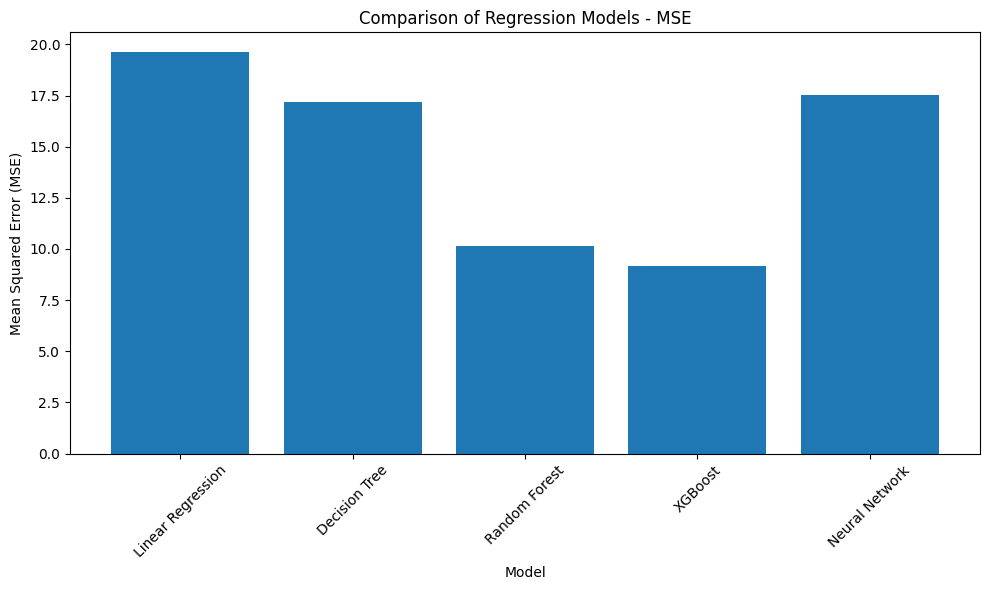

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

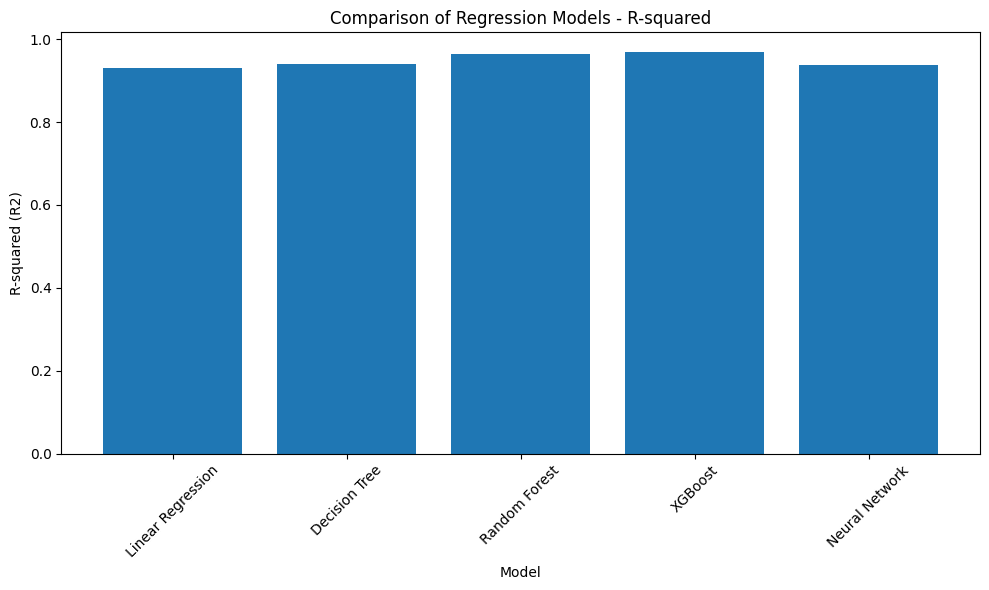

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load and preprocess the dataset
data = pd.read_csv('power_plant_data.csv')
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Create a list of models with hyperparameter grids for hyperparameter tuning
models = {
    'Linear Regression': {
        'model': LinearRegression(),
        'params': {}
    },
    'Decision Tree': {
        'model': DecisionTreeRegressor(random_state=42),
        'params': {
            'max_depth': [None, 5],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
    },
    'Random Forest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [None, 5],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
    },
    'XGBoost': {
        'model': XGBRegressor(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [3, 5],
            'learning_rate': [0.1, 0.2]
        }
    },
    'Neural Network': {
        'model': Sequential([
            Dense(64, input_dim=X_train.shape[1], activation='relu'),
            Dense(32, activation='relu'),
            Dense(1, activation='linear')
        ]),
        'params': {}
    }
}

# Dictionary to store model evaluation results
results = {'Model': [], 'MSE': [], 'R-squared': []}

# Evaluate each model using cross-validation and hyperparameter tuning
for name, model_data in models.items():
    model = model_data['model']
    params = model_data['params']

    if name == 'Neural Network':
        # Compile and train the neural network model
        model.compile(loss='mean_squared_error', optimizer='adam')
        history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)
        y_pred = model.predict(X_test)
    else:
        # Perform hyperparameter tuning using GridSearchCV
        grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        model = grid_search.best_estimator_
        y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results['Model'].append(name)
    results['MSE'].append(mse)
    results['R-squared'].append(r2)

    print(f"{name} - Mean Squared Error: {mse:.4f}, R-squared: {r2:.4f}")

    # Save the trained model to disk for reuse later
    from joblib import dump
    dump(model, f'{name}.joblib')

# Convert results dictionary to DataFrame for visualization
results_df = pd.DataFrame(results)

# Plot Mean Squared Error (MSE) results
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['MSE'])
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Regression Models - MSE')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot R-squared (R2) results
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['R-squared'])
plt.xlabel('Model')
plt.ylabel('R-squared (R2)')
plt.title('Comparison of Regression Models - R-squared')
plt.xticks(rotation=45)
plt.tight_layout()
plt